# Run front diagnostics 


![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)

## Velocity metrics package illustration: Run front diagnostics 

### Agulhas, BFN-QG 




***
**Authors:** Datlas <br>
**Copyright:** 2024 Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Run front diagnostics: Agulhas, BFNQG currents maps</center></h1>
 <h5><center> The notebook aims to illustrate how to run the velocity metrics. Here, the example uses surface current maps produced by the BFN-QG in the Agulhas region.</center></h5>

In [1]:
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics
import warnings
warnings.filterwarnings('ignore')
import sys   
sys.path.append('../')
from src import utils

<br>

## Parameters

### Parameters and paths

In [2]:
dirpath = '../dc_data/DC_example_BFNQG_Agulhas/'

par_out = {"pattern": f'frontsvel_Agulhas_BFNQG_0m',
               "outdir": dirpath + 'fronts_outputs_bfnqg'}

front_rep = 'fronts_Agulhas/'
front_pattern = 'seviri_sst_woc_t1'
gradient_threshold = 0.01
par_fronts = {"dir_front": dirpath+front_rep, 
              "pattern": front_pattern,
              "gradient_threshold": gradient_threshold}

data_type = dirpath + 'dictionnaries/data_type_metric_illustration_bfnqg.json'

region = dirpath + 'dictionnaries/region_metric_illustration_Agulhas.json'

first_date = '20190101T000000Z'

last_date = '20190120T000000Z'


outputplot = '../results/metrics_illustration/'


### Compute front diagnostics

In [3]:
compare_fronts_vel.run(par_out, par_fronts, data_type,
                           region=region, depth=0,
                           first_date=first_date, 
                           last_date=last_date,
                           syntool=False, ext='json')

Percent: [############################--] 95.00%, , 

100%|██████████| 488/488 [00:12<00:00, 38.91it/s]


### Compute box statistics

In [4]:
dic_list = box_metrics.run(dirpath+'dictionnaries/config_fronts.json', 2, 
                first_date='20190110T000000Z',
                last_date ='20190120T000000Z',
                output_dir=outputplot, 
                plot=False)

### Plot box statistics

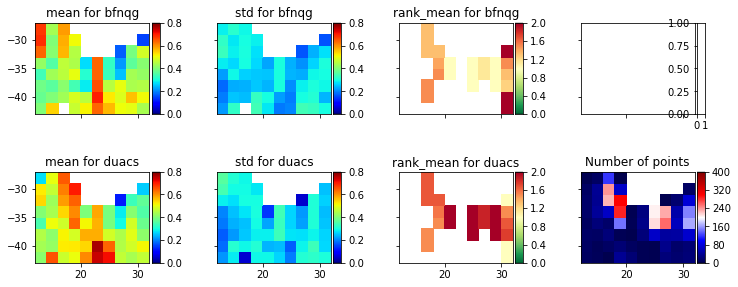

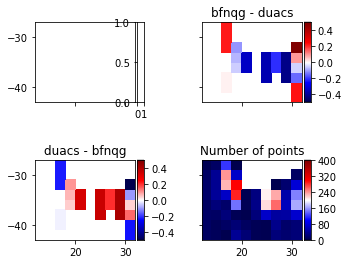

In [5]:
path = outputplot + 'bfnqg_duacs_2019-01-10T00:00:00.000000Z_2019-01-20T00:00:00.000000Z_mean.nc'

dic_list = box_metrics.run_plot(path, 
                                dirpath+'dictionnaries/config_fronts.json', 
                                size=2,
                                dir_out=outputplot)